In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pwd

/Users/soujanya/Datascience/Netflix_MR


In [3]:
movies=pd.read_csv('movie_titles.csv', sep=',', header = None,usecols = [0,1,2],
                           names=['Movie_Id', 'Year_of_release', 'Title'], verbose=True,
                       encoding = "ISO-8859-1")
print(movies.shape)

Tokenization took: 4.63 ms
Type conversion took: 8.00 ms
Parser memory cleanup took: 0.01 ms
(17770, 3)


In [72]:
movies.head(5)

,Movie_Id,Year_of_release,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [5]:
movies.tail(5)

,Movie_Id,Year_of_release,Title
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company
17769,17770,2003.0,Alien Hunter


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie_Id         17770 non-null  int64  
 1   Year_of_release  17763 non-null  float64
 2   Title            17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [7]:
txt_df = pd.read_csv('combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating','Date'], usecols = [0,1,2],compression='zip')

In [8]:
txt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
 2   Date     object 
dtypes: float64(1), object(2)
memory usage: 550.7+ MB


In [9]:
print(txt_df.tail(5))

          Cust_Id  Rating        Date
24058258  2591364     2.0  2005-02-16
24058259  1791000     2.0  2005-02-10
24058260   512536     5.0  2005-07-27
24058261   988963     3.0  2005-12-20
24058262  1704416     3.0  2004-06-02


In [10]:
%%time
import pandas as pd
separated_data=['combined_data_1.txt.zip','combined_data_2.txt.zip',
 'combined_data_3.txt.zip','combined_data_4.txt.zip']
cols = ['Cust_Id', 'Rating','Date']
ratings_df=pd.DataFrame(columns=cols)
for file in separated_data:
    df1=pd.read_csv(file,header=None, names = ['Cust_Id', 'Rating','Date'], usecols = [0,1,2],compression='zip')
    df1["Movie_Id"]="NaN"
    df3=df1[df1["Cust_Id"].apply(lambda x:x[-1]==":")]
    df3["Cust_Id"] = df3["Cust_Id"].str.strip()
    df3["Movie_Id"] = df3["Cust_Id"].replace(":","")
    df1.loc[df3.index,:]=df3
    df1["Movie_Id"] = df1["Movie_Id"].str.strip()
    df1["Movie_Id"] = df1["Movie_Id"].replace("NaN",np.nan)
    df1["Movie_Id"] = df1["Movie_Id"].str.replace(":","")
    df1["Movie_Id"]=df1["Movie_Id"].fillna(method="ffill")
    df1=df1[df1["Rating"].notnull()]
    ratings_df = ratings_df.append(df1)

print(ratings_df.shape)
print(ratings_df["Movie_Id"].nunique())
print(ratings_df.head(5))
print("Printing Tail Data")
print(ratings_df.tail(5))

(100480507, 4)
17770
   Cust_Id Rating        Date Movie_Id
1  1488844    3.0  2005-09-06        1
2   822109    5.0  2005-05-13        1
3   885013    4.0  2005-10-19        1
4    30878    4.0  2005-12-26        1
5   823519    3.0  2004-05-03        1
Printing Tail Data
          Cust_Id Rating        Date Movie_Id
26851921  1790158    4.0  2005-11-01    17770
26851922  1608708    3.0  2005-07-19    17770
26851923   234275    1.0  2004-08-07    17770
26851924   255278    4.0  2004-05-28    17770
26851925   453585    2.0  2005-03-10    17770
CPU times: user 1min 43s, sys: 21.7 s, total: 2min 5s
Wall time: 2min 13s


In [11]:
print(movies.columns)

Index(['Movie_Id', 'Year_of_release', 'Title'], dtype='object')


In [12]:
movies.head(5)

,Movie_Id,Year_of_release,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie_Id         17770 non-null  int64  
 1   Year_of_release  17763 non-null  float64
 2   Title            17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [14]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100480507 entries, 1 to 26851925
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Cust_Id   object
 1   Rating    object
 2   Date      object
 3   Movie_Id  object
dtypes: object(4)
memory usage: 3.7+ GB


In [15]:
ratings_df.infer_objects().dtypes

Cust_Id      object
Rating      float64
Date         object
Movie_Id     object
dtype: object

In [16]:
ratings_df[['Cust_Id', 'Movie_Id']] = ratings_df[['Cust_Id', 'Movie_Id']].astype(int)
ratings_df['Date'] =  pd.to_datetime(ratings_df['Date'])

In [17]:
ratings_df.dtypes

Cust_Id              int64
Rating              object
Date        datetime64[ns]
Movie_Id             int64
dtype: object

In [18]:
# merging the movies dataframe with rating dataframe
df=pd.merge(movies, ratings_df, on = "Movie_Id", how='inner')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Movie_Id         int64         
 1   Year_of_release  float64       
 2   Title            object        
 3   Cust_Id          int64         
 4   Rating           object        
 5   Date             datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.2+ GB


In [152]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  1


In [154]:
df.isnull().sum()

Movie_Id             0
Year_of_release    965
Title                0
Cust_Id              0
Rating               0
Date                 0
dtype: int64

In [153]:
dup_bool = df.duplicated(['Movie_Id','Cust_Id','Rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [156]:
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.Cust_Id)))
print("Total No of movies  :", len(np.unique(df.Movie_Id)))


Total no of ratings : 100480507
Total No of Users   : 480189
Total No of movies  : 17770


In [20]:
## method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

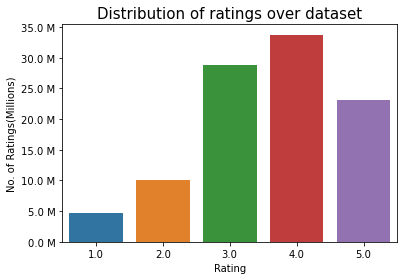

In [159]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over dataset', fontsize=15)
sns.countplot(df.Rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

In [162]:
print(f"The minimum Customer_Id and the maximum Customer_Id in the df are {df.Cust_Id.min(),df.Cust_Id.max()} respectively")

The minimum Customer_Id and the maximum Customer_Id in the df are (6, 2649429) respectively


know that there are only 480189 unique customers in the df which will lead to confusion.
Hence we're going to map them as continuous integers

In [25]:
df.Cust_Id.unique().shape[0]

480189

In [26]:
# creating a dict map to map old Cust_Id to new and continuous Customer_Id
mapping={old:new for old,new in list(zip(sorted(df.Cust_Id.unique()),
                  range(df.Cust_Id.unique().shape[0])))}

In [27]:
# applying the above mapping
df['Cust_Id']=df['Cust_Id'].map(mapping)

In [28]:
# checking if the new Cust_Id is continuous
print(df.Cust_Id.unique().shape[0])
print(df.Cust_Id.min())
print(df.Cust_Id.max())

480189
0
480188


### Checking the distribution of popularity of the movies

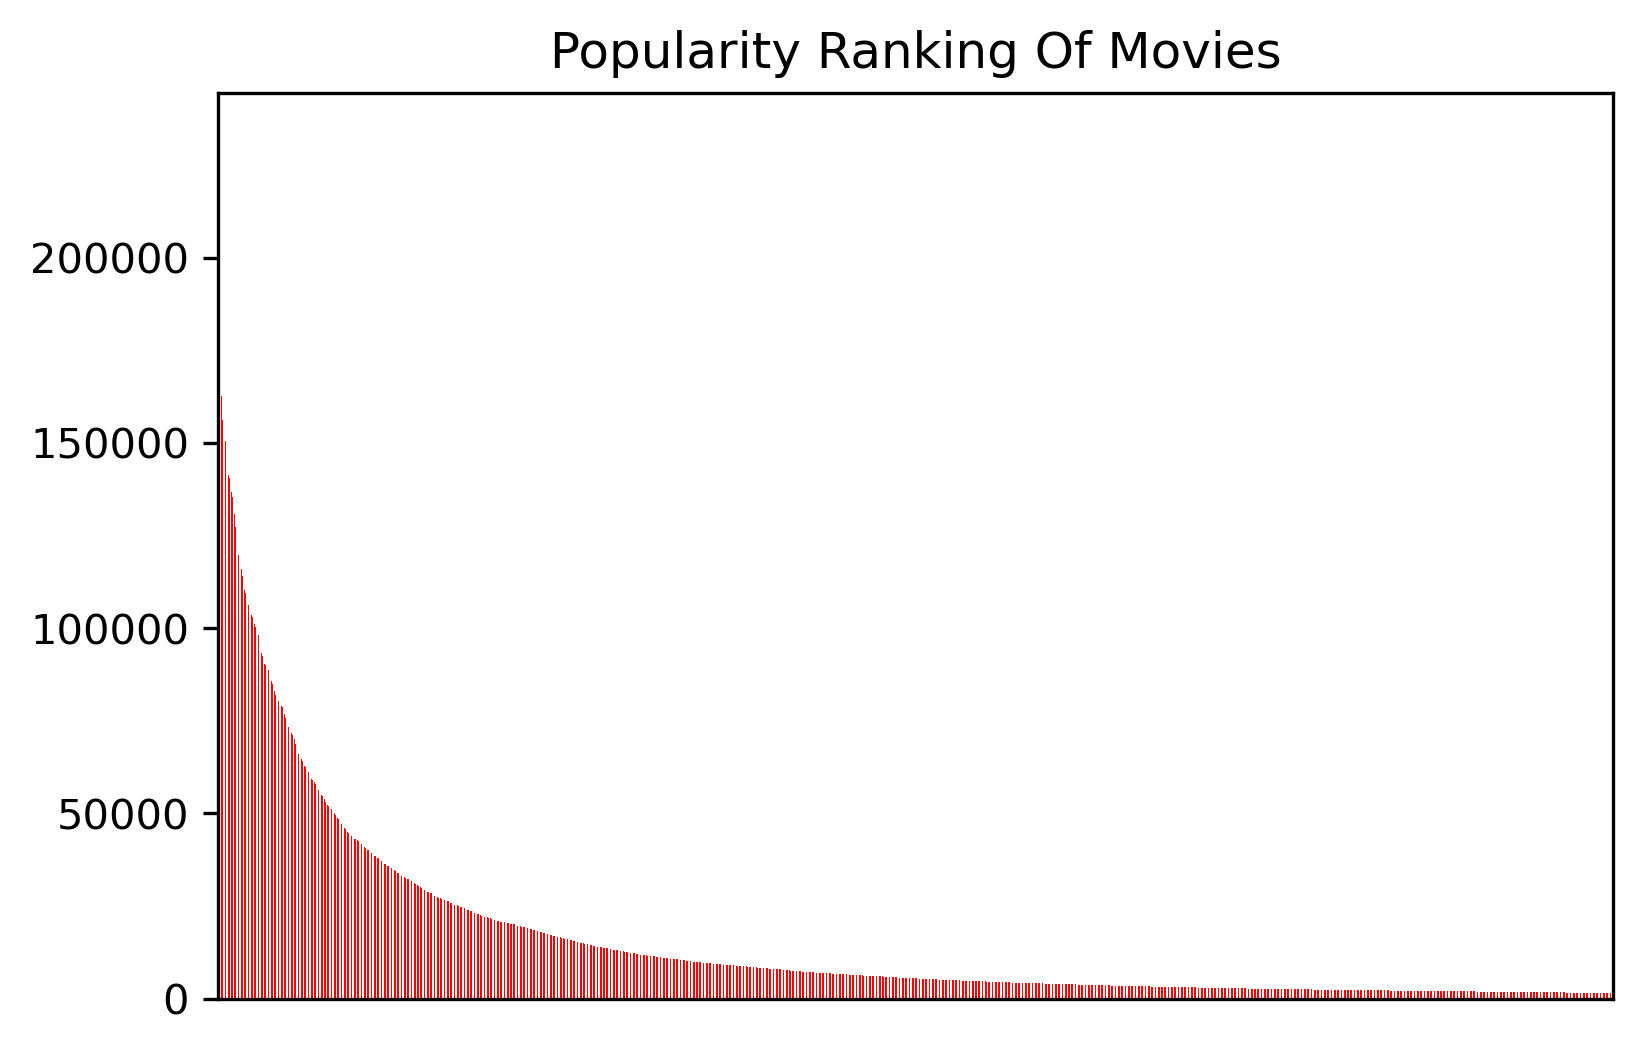

In [179]:
plt.figure(dpi=300)
plt.title('Popularity Ranking Of Movies') 
df.Movie_Id.value_counts()[:6000].plot(kind='bar', color='red')
plt.xticks(ticks=[]);

### Checking the distribution of ratings of the movies

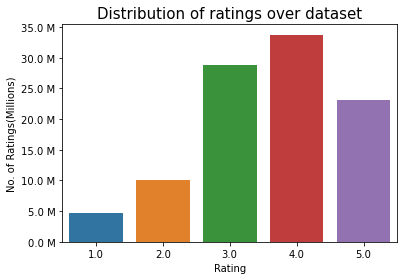

In [180]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over dataset', fontsize=15)
sns.countplot(df.Rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

### List of top 20 best movies as per the average user rating.

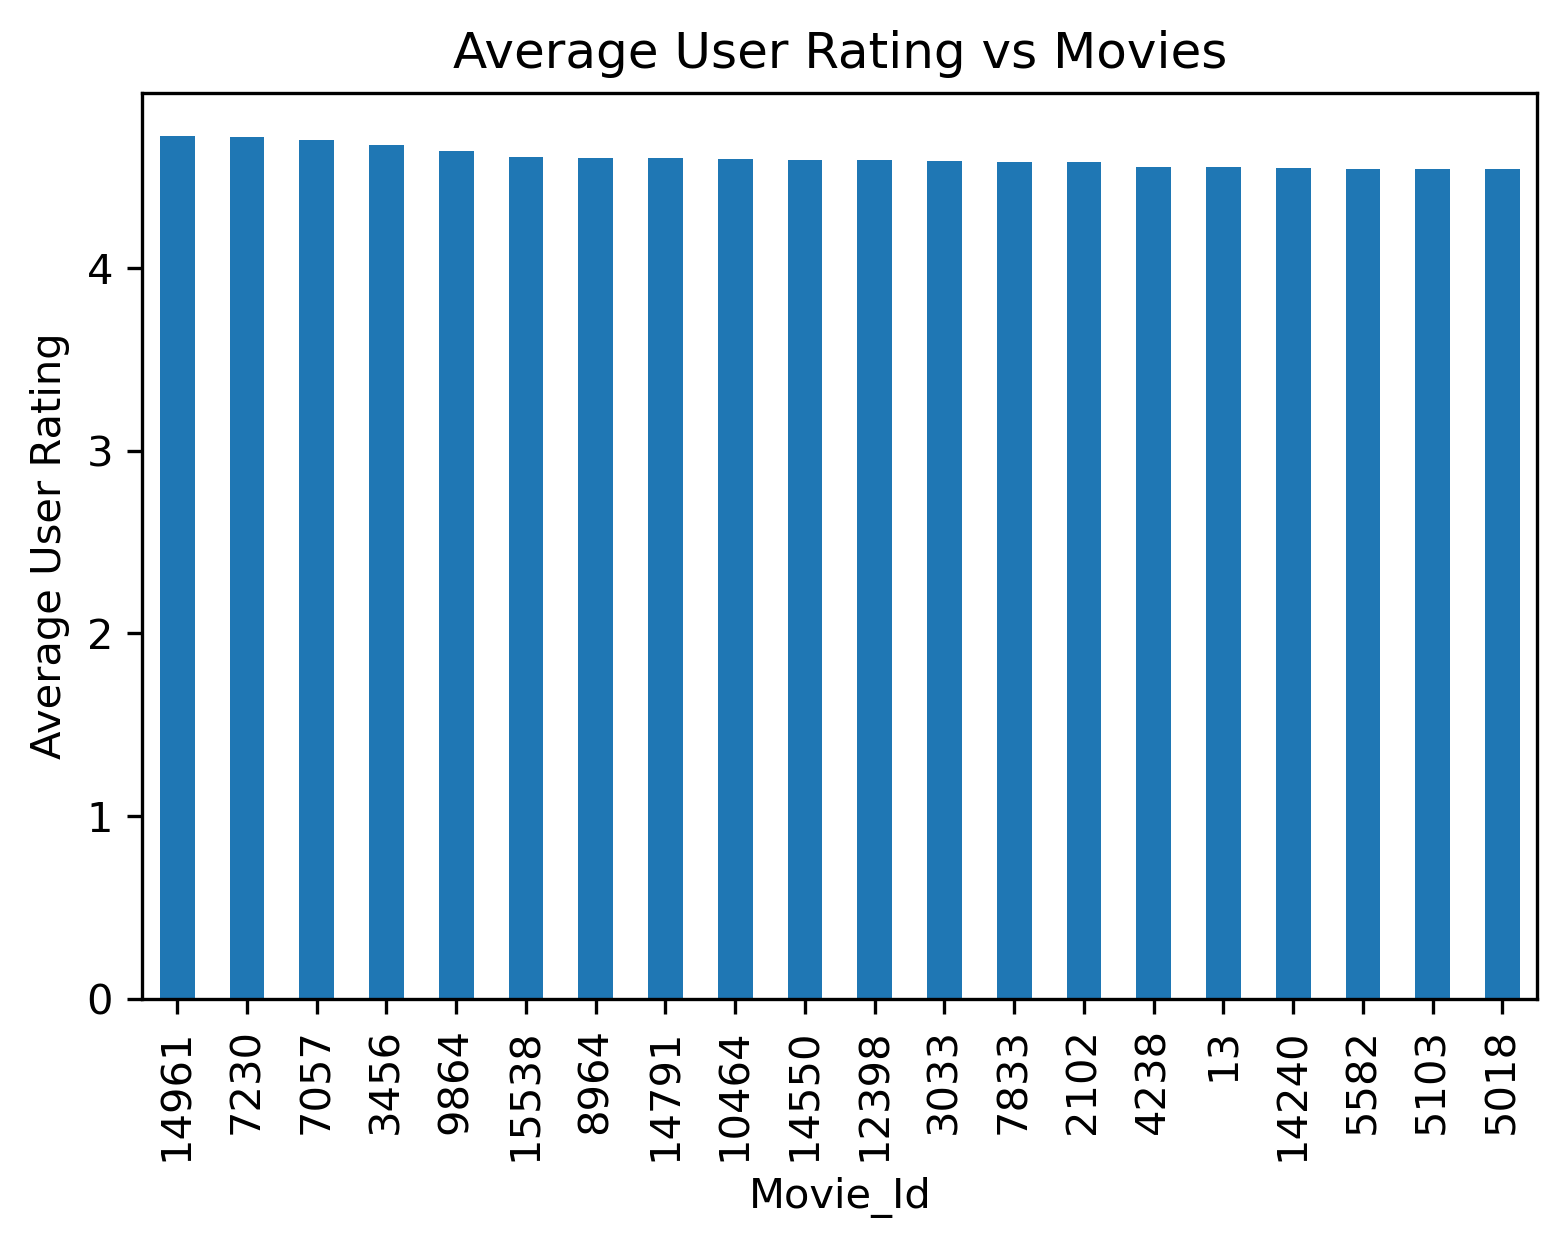

In [182]:
# average user rating of top 20 movies
plt.figure(dpi=300)
plt.title('Average User Rating vs Movies') 
plt.ylabel('Average User Rating') 
(df.groupby(by='Movie_Id')['Rating']
.mean().sort_values(ascending=False)[:20]).plot(kind='bar');

### Add new column (week day) to the data set for analysis.

In [185]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None  
df['day_of_week'] = df.Date.dt.day_name()
df.tail()

,Movie_Id,Year_of_release,Title,Cust_Id,Rating,Date,day_of_week
100480502,17770,2003.0,Alien Hunter,324830,4.0,2005-11-01,Tuesday
100480503,17770,2003.0,Alien Hunter,291851,3.0,2005-07-19,Tuesday
100480504,17770,2003.0,Alien Hunter,42442,1.0,2004-08-07,Saturday
100480505,17770,2003.0,Alien Hunter,46235,4.0,2004-05-28,Friday
100480506,17770,2003.0,Alien Hunter,82582,2.0,2005-03-10,Thursday


### Number of Ratings per a month

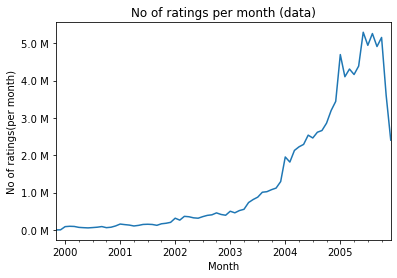

In [186]:
%% time
ax = df.resample('m', on='Date')['Rating'].count().plot()
ax.set_title('No of ratings per month (data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

### Analysis on the Ratings given by user

In [29]:
no_of_rated_movies_per_user = df.groupby(by='Cust_Id')['Rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()


Cust_Id
55373     17653
70466     17436
442139    16565
301823    15813
383961    14831
Name: Rating, dtype: int64

PDF is a statistical term that describes the probability distribution of the continues random variable
The cumulative distribution function is applicable for describing the distribution of random variables 
either it is continuous or discrete

The CDF of a variable X, or just distribution function of X, is essentially just a 
representation of the probability that X will take a value less than or equal to X. Of course, this is a function of continuous statistical features.

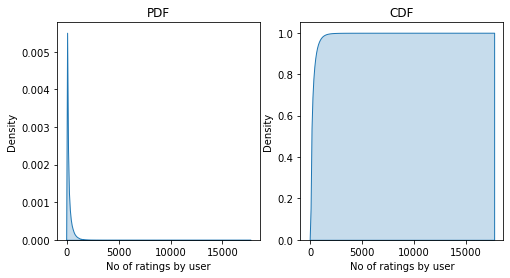

CPU times: user 5.36 s, sys: 682 ms, total: 6.05 s
Wall time: 3.2 s


In [188]:
%%time
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

 ### Analysis of ratings of a movie given by a user

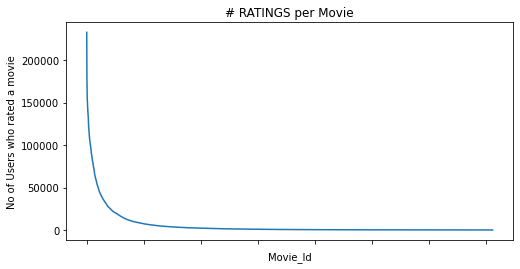

CPU times: user 1.11 s, sys: 814 ms, total: 1.92 s
Wall time: 2.42 s


In [30]:
%%time
no_of_ratings_per_movie = df.groupby(by='Movie_Id')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie_Id')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

- It is very skewed.. just like nunmber of ratings given per user.
- There are some movies (which are very popular) which are rated by huge number of users.

- But most of the movies(like 90%) got some hundereds of ratings.

### Number of ratings on each day of the week

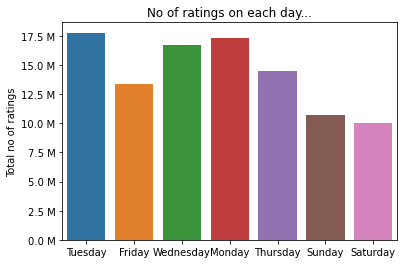

In [191]:
%%time
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()


In [192]:
avg_week_df = df.groupby(by=['day_of_week'])['Rating'].mean()
print(" AVerage ratings")
print(avg_week_df)


 AVerage ratings
day_of_week
Friday       3.605892
Monday       3.597735
Saturday     3.614754
Sunday       3.616449
Thursday     3.604305
Tuesday      3.595808
Wednesday    3.604725
Name: Rating, dtype: float64


###  Here we're going to produce the utility matrix by pivoting the dataframe df with Movie_Id as rows, Customer_Id as columns and the Rating as the cell values. Also we're going to use item-item cosine similarity based collaborative filtering technique to build our recommendation system.

### Let's centre the rating vectors of every movie by subtracting it by average rating of the movie. We're doing this in order to make better sense of the cosine similarity.

In [31]:
# finding the average rating for each movie
mean_rating=df.groupby(by='Movie_Id')[['Rating']].mean() 
mean_rating.head()

,Rating
Movie_Id,
1,3.749543
2,3.558621
3,3.641153
4,2.739437
5,3.919298


In [32]:
# merging the above df with the original df
tmp=pd.merge(df, mean_rating, left_on='Movie_Id', right_index=True, how='inner')
tmp.head()

,Movie_Id,Year_of_release,Title,Cust_Id,Rating_x,Date,Rating_y
0,1,2003.0,Dinosaur Planet,270045,3.0,2005-09-06,3.749543
1,1,2003.0,Dinosaur Planet,149546,5.0,2005-05-13,3.749543
2,1,2003.0,Dinosaur Planet,160878,4.0,2005-10-19,3.749543
3,1,2003.0,Dinosaur Planet,5466,4.0,2005-12-26,3.749543
4,1,2003.0,Dinosaur Planet,149791,3.0,2004-05-03,3.749543


In [33]:
%%time
# creating a df containing the movie-wise centred ratings
df=tmp[['Movie_Id','Cust_Id']] 
df['Rating']=tmp['Rating_x']-tmp['Rating_y'] 
df.head()

CPU times: user 1.66 s, sys: 5.13 s, total: 6.79 s
Wall time: 6.3 s


,Movie_Id,Cust_Id,Rating
0,1,270045,-0.749543
1,1,149546,1.250457
2,1,160878,0.250457
3,1,5466,0.250457
4,1,149791,-0.749543


### Since utility matrix is going to be a massive, we're going to use csr_matrix to represent it.

- **Sparse Data**: is a data set where most of the item values are *zero*.

- **Dense Array**: is the opposite of a sparse array: most of the values are not zero.

**There are primarily two types of sparse matrices that we use:**

- CSC - Compressed Sparse Column. For efficient arithmetic, fast column slicing.

- CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products

In [21]:
df.dtypes

Movie_Id                    int64
Year_of_release           float64
Title                      object
Cust_Id                     int64
Rating                     object
Date               datetime64[ns]
dtype: object

In [22]:
df[['Rating']] = df[['Rating']].astype(float)


In [23]:
df.dtypes

Movie_Id                    int64
Year_of_release           float64
Title                      object
Cust_Id                     int64
Rating                    float64
Date               datetime64[ns]
dtype: object

In [34]:
%%time
rows=df.Movie_Id.values
cols=df.Cust_Id.values
data=df.Rating.values
utility=sp.sparse.csr_matrix((data, (rows, cols)), shape=(1+df.Movie_Id.unique().shape[0],1+df.Cust_Id.unique().shape[0])) 
utility

CPU times: user 9.47 s, sys: 1.35 s, total: 10.8 s
Wall time: 11.5 s


<17771x480190 sparse matrix of type '<class 'numpy.float64'>'
	with 100480507 stored elements in Compressed Sparse Row format>

In [35]:
# unsupervised learning algo for recommendation system
from sklearn.neighbors import NearestNeighbors

In [36]:
# capturing the pair of movie index and user index who actually rated the movie
mov_idx,user_idx=utility.nonzero()

In [37]:
len(mov_idx), len(user_idx)

(100472212, 100472212)

## Recommender System Based On Collaborative Filtering Item-Item Cosine Similarity

In [48]:
def recommendations(user_id):
    #List the top 5 movies rated by given user
    user_top_movies=utility[:,user_id].toarray().reshape(-1,)
    # finding the argmax for top 5 ratings
    user_top_movies=user_top_movies.argsort()[-5:][::-1]
    print(f'The list of top 5 rated movies by the Cust_Id {user_id} are') 
    for film in movies.iloc[user_top_movies]['Title'].values:
        print(film)
    # rating vectors of all the movies rated by this user 
    # in otherwords utility submatrix 
    sub_utility=utility[mov_idx[user_idx==user_id]]
    # instantiating KNN model with default 5 neigbors
    knn=NearestNeighbors(metric='cosine', n_jobs=-1, algorithm='brute')
    # training the above algorithm on the utility submatrix
    knn.fit(sub_utility)
    # collecting list of movies not watched by this user
    unwatched =list(set(range(1,17771)).difference(set(mov_idx[user_idx==user_id])))
    unwatched_rating=[-10]*17771
    # for every unwatched film by this user 
    for newfilm in unwatched:
        # we're finding the rating vector of the movie
        rate_vector=utility[newfilm].toarray()
        # extracting the cosine distances and movie_id
        distance,movieid=knn.kneighbors(rate_vector, 5, return_distance=True) 
        # reshape the distance and the ids
        distance,movieid=distance.reshape(-1,),movieid.reshape(-1,) 
        # converting cosine distance to cosine similarity
        similarity=1-distance
        # ratings of the aforementioned 5 most similar movies by this user
        rates=utility[:,user_id][movieid].toarray().reshape(-1,) 
        # finding the weighted mean of the 5 highly rated movies
        predicted_rating=np.dot(similarity,rates)/np.abs(similarity).sum()
        # assigning the predicted_rating at the respective index 
        # corresponding to the movie index 
        unwatched_rating[newfilm]=predicted_rating
    # converting it to numpy array
    unwatched_rating=np.array(unwatched_rating) # finding the argmax for top 5 ratings
    top_recommends=unwatched_rating.argsort()[-5:][::-1]
    print(f'\nThe list of top 5 recommended movies for the Cust_Id {user_id} are')
    for recommend in movies.iloc[top_recommends]['Title'].values:
        print(recommend)


### The recommender function will first display top 5 highly rated movies by a given Customer_ID and then 
### it'll display top 5 recommended movies for this user.

In [49]:
%%time 
recommendations(160180)

The list of top 5 rated movies by the Customer_Id 160180 are
Spike & Mike's Classic Festival of Animation
The Abominable Dr. Phibes
Class of Nuke 'Em High
Sniper School
Off Limits

The list of top 5 recommended movies for the Cust_Id 160180 are
Roseanne: Season 1
Cardcaptor Sakura: The Movie
The NBA's 100 Greatest Plays
Stephen King's Cat's Eye
How's Your News?


## Recommending Similar Movies While Searching

In [50]:
# nearest_neighbor object to find the similar movies
similar_movies=NearestNeighbors(metric='cosine', n_jobs=-1, algorithm='brute') 
# fitting the above learning algo on the utility matrix
similar_movies.fit(utility)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [96]:
movie_name=input('Enter your search phrase here: ').lower()
# finding the matches in the list of movie titles
filtered=movies[movies.Title.str.lower().str.contains(movie_name)]
filtered = filtered.drop_duplicates('Title', keep='last')
for title in filtered.Title.values:
        print(title)
print(len(filtered))

Enter your search phrase here: Titanic
Titanic Collection
Titanica: IMAX
The Titanic (Documentary)
The Titanic
Titanic: The Complete Story
Titanic
Mysteries of the Deep: Legendary Shipwrecks: Secrets of the Titanic
7


In [95]:
type(filtered)

pandas.core.frame.DataFrame

In [98]:
def search():
    # lower casing the searched title
    movie_name=input('Enter your search phrase here: ').lower()
    # finding the matches in the list of movie titles
    filtered=movies[movies.Title.str.lower().str.contains(movie_name)]
    filtered = filtered.drop_duplicates('Title', keep='last')
    if len(filtered)==0:
        print("Couldn't find this movie. Please try again!") 
        return
    if len(filtered)>10:
        print("Search phrase is too generic. Please try again!") 
        return
    print(f'\nTop matches for your search phrase are:') 
    for title in filtered.Title.values:
        print(title)
        match_ids=filtered.Movie_Id.values 
        # list of search phrase matching movie ids 
        similar_ids=[]
        seen=set()
        # to avoid repeatedly recommending same movie
    for ids in match_ids:
        # capturing cosine distance and similar movie id from kneighbors 
        #for ids from every matching id 
        dis,mov=similar_movies.kneighbors(utility[ids],
                                            n_neighbors=6, 
                                          return_distance=True)
        for i in range(1,6):
            # adding the cosine distance and similar movie id as long as 
            # the similar movie id is not already in the match_ids list 
            if (mov[0][i] not in match_ids) and (mov[0][i] not in seen):
                seen.add(mov[0][i])
                similar_ids.append([dis[0][i],mov[0][i]])
    similar_ids.sort(key=lambda x:x[0]) # sorting based on the distance
    print(f'\nRecommended watch:')
    for dist, mov_id in similar_ids[:10]:
        # printing only the titles of the top 10 most similar movies
        print(movies.Title.values[movies.Movie_Id==mov_id][0])


In [70]:
%%time
search()


Enter your search phrase here: finding nemo

Top matches for your search phrase are:
Finding Nemo (Widescreen)
Finding Nemo (Full-screen)

Recommended watch:
Monsters
Shrek (Full-screen)
Shrek 2
A Bug's Life
The Incredibles
Toy Story 2
CPU times: user 13 s, sys: 5.76 s, total: 18.8 s
Wall time: 12.1 s


In [71]:
%%time
search()

Enter your search phrase here: Forest

Top matches for your search phrase are:
Mermaid Forest
The Singing Forest
The Emerald Forest
Ferngully: The Last Rainforest
The Petrified Forest
Tropical Rainforest: IMAX

Recommended watch:
K-Hole
Fafner
Traveling to Olympia
Eden's Curve
Murder in Portland
Violet's Visit
Tokyo Underground
Dears
C.S. Lewis: The Magic Never Ends
Mobile Suit Gundam SEED the Movie 2: The Far-Away Dawn
CPU times: user 38.4 s, sys: 17.3 s, total: 55.7 s
Wall time: 23.6 s


In [99]:
%%time
search()

Enter your search phrase here: Titanic

Top matches for your search phrase are:
Titanic Collection
Titanica: IMAX
The Titanic (Documentary)
The Titanic
Titanic: The Complete Story
Titanic
Mysteries of the Deep: Legendary Shipwrecks: Secrets of the Titanic

Recommended watch:
Ghost
We Remember Marilyn
Erin Brockovich
Mysteries of the Deep: Legendary Shipwrecks: Last Voyage of the Lusitania
Pretty Woman
Pearl Harbor
Steel Magnolias
Bob Hope: Hollywood's Brightest Star
The Unknown Jimmy Durante
Underwaterworld Trilogy: Deep Encouters / Ocean Allies / Blue Voices
CPU times: user 43.1 s, sys: 20.7 s, total: 1min 3s
Wall time: 23.6 s
